**Name:** <span style="color:red">Jan Izquierdo, Carmen Samedi</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 6
# Stochastic description of protein expression

---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aul@-ESCI***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

Here we implement a stochastic description of simple protein expression processes, using a stochastic simulation algorithm know as the *next-reaction method*. We will consider a biochemical process constituted by $M$ reactions, denoted by $\mu=1,2,\ldots, M$, and $N$ biomolecular species, denoted by $i=1,2,\ldots,N$.

Let the rate of reaction $\mu$ be $k_\mu$, and their corresponding reactants $x_i^{(\mu)}$. The probability that this reaction occurs in the interval $(t,t+dt)$ given the state of the system at time $t$ is given by $a_\mu dt$, where $a_\mu$ is the *propensity* of the reaction. Following the law of mass action, and assuming that only one molecule of each reactant species is involved, the propensity of reaction $\mu$ has the form:

$$
a_\mu=k_\mu \prod_{i=1}^N x_i^{(\mu)}
$$

Another important piece of information that characterizes the reactions is the *stoichiometry matrix* $S_{\mu,i}$. The columns of this matrix are the reactions and the rows are the biomolecular species. The elements of the matrix represent how each reaction affect each species (e.g. a species that loses one molecule in a reaction has a value -1 in the corresponding matrix location, while if the reaction produces two molecules of a species, the corresponding matrix element is 2). Once the propensities and the stoichimetry matrix are known, the steps of the next-reaction stochastic simulation algorithm are:

1. Initialize the system (number of molecules and time)

2. Calculate the propensities of all reactions

3. Calculate the time $\tau$ at which the next reaction happens, using the expression:
$$
\tau=\frac{1}{a_{tot}}\ln\frac{1}{z_1}
$$
where $a_{tot}=\sum_{\nu=1}^Ma_\nu$ and $z_1$ is a random number uniformly distributed between 0 and 1.

4. Determine the reaction that occurs at time $\tau$ by calculating the smallest integer $\lambda$ such that
$$
\sum_{\nu=1}^\lambda a_\nu > z_2 \sum_{\nu=1}^Ma_\nu
$$
where $z_2$ is another random number uniformly distributed between 0 and 1.

5. Update the molecule numbers according to the stoichimetry coefficients $S_{\mu,i}$.

6. Go to step 2 to compute the next reaction.

Let us implement this algorithm for a simple birth-death process representing protein expression and degradation:
$$
\emptyset\overset{k_{exp}}{\rightarrow} A,\quad A\overset{k_{deg}}{\rightarrow}\emptyset
$$

First, we load all necessary `Python` packages.

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

Next, we define the values of the parameters, the stoichimetry matrix and the initial conditions (step 1 above). We consider first that $k_{exp}=100$ and $k_{deg}=1$.

In [22]:
k_exp=100
k_deg=1


c_time=0 #current time
tmax=200
mt=0.1
num_molec=0 #At t0 we have 0 A molecules

Now we compute the propensities (step 2 above), calculate the next reaction time (step 3), and determine the reaction that takes place (step 4). For steps 3 and 4 use the function `uniform` from the module `numpy.random`.

In [23]:
#Step2: Propensities for producing and degrading A
def calculate_prop(n_mol, k_exp, k_deg):
    a_exp=k_exp #Propensity for producing A (reaction expresed)
    a_deg=k_deg*n_mol #Prop for degradating A
    return a_exp, a_deg

#Step3: Calc next reaction time
def next_Rtime(a_tot):
    z=np.random.uniform(0,1)
    t=(1/a_tot)*np.log(1/z) #a_tot=a_exp+a_deg
    return t

#Step4: Reaction to take place

def Rdecide(a_exp, a_tot):
    z2=np.random.uniform(0,1)

    if a_exp > z2*a_tot:
        return 1 #expression
    return 0 #degradation

Finally, we update the molecule numbers and the time variable (step 5 above).

In [24]:
def update_molec(reaction, n_molec):

    if reaction==1: #expression
        n_molec+=1  #more molec
    elif reaction==0 and n_molec>0: #degradation, but n_molec cant be negative
        n_molec-=1
        
    return n_molec



Now put together steps 2-5 above in a loop, and generate output every *mt* time units (you might need to save the same state of the system for multiple output times, if no reaction happens in a given *mt* interval). Run the simulation for 200 time units with sampling period $mt=0.1$.

In [25]:
c_time=0 #current time
tmax=200
mt=0.1

timeList=[]
n_molec=[]
while c_time < tmax:
    timeList.append(c_time)
    n_molec.append(num_molec)
    a_exp, a_deg=calculate_prop(num_molec, k_exp, k_deg)
    a_tot=a_exp+a_deg

    #add break in case of emergency
    if a_tot==0:
        break
    
    Rtime=next_Rtime(a_tot)
    #add R time to time, so steps in range are irregular, they depend on previous reation
    c_time+=Rtime

    R=Rdecide(a_exp, a_tot)
    num_molec=update_molec(R, num_molec)

print(n_molec)
    

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 13, 14, 15, 14, 15, 16, 17, 16, 17, 18, 19, 20, 21, 20, 21, 20, 21, 22, 23, 24, 25, 26, 25, 26, 25, 26, 27, 28, 29, 28, 29, 30, 31, 32, 31, 32, 31, 32, 33, 34, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 42, 43, 44, 45, 46, 45, 46, 47, 48, 49, 48, 49, 48, 49, 50, 49, 50, 51, 50, 49, 48, 49, 48, 47, 48, 49, 50, 49, 50, 51, 52, 51, 52, 53, 54, 55, 54, 55, 56, 57, 56, 57, 58, 59, 58, 57, 58, 59, 58, 59, 60, 61, 60, 61, 62, 63, 64, 63, 64, 65, 64, 65, 66, 67, 66, 65, 64, 63, 62, 63, 64, 65, 64, 63, 62, 63, 64, 65, 66, 65, 66, 67, 68, 69, 70, 69, 68, 69, 70, 71, 72, 71, 72, 73, 72, 73, 74, 73, 74, 73, 74, 73, 74, 73, 72, 71, 72, 71, 70, 71, 70, 71, 72, 71, 70, 71, 72, 73, 74, 73, 72, 73, 72, 71, 72, 73, 74, 75, 76, 75, 74, 73, 74, 73, 74, 75, 76, 75, 76, 77, 78, 77, 78, 77, 76, 77, 76, 77, 78, 79, 78, 77, 78, 79, 78, 77, 76, 77, 78, 77, 78, 77, 76, 75, 76, 77, 78, 77, 78, 79, 80, 79, 78, 77, 76, 77, 78, 77, 78, 79, 80, 79, 80, 81, 82, 81, 8

Now we plot the time series of molecule numbers, and the histogram of molecule number of all data during the second half of the simulation (stationary state). Normalize this histogram so that it has unit area, and compare it with the expression of the Poisson distribution derived in class.

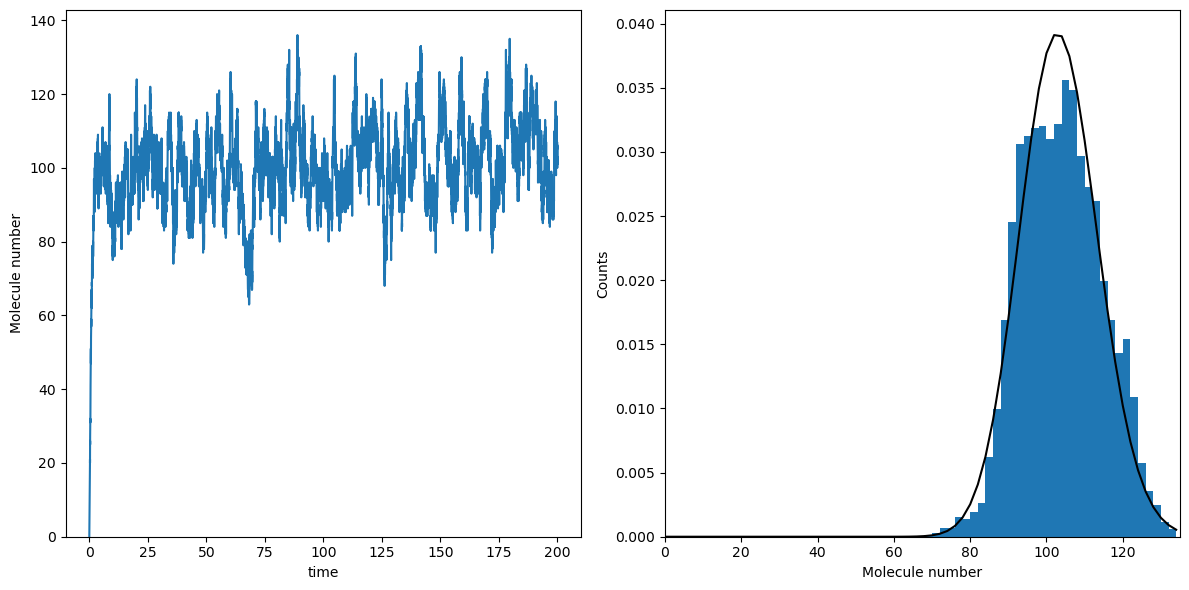

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

#Plot molecule number
plt.plot(timeList, n_molec)
plt.ylim(0)
plt.xlabel("time")
plt.ylabel("Molecule number")


#Histogram parameters
half_sim=len(timeList)//2 #divide by half and get an integer to find 2nd half of the simulation (2n time period)
h2_molecList=n_molec[half_sim:] #2nd half of the molec list

#Bin sizes for histogram
binxStart=min(h2_molecList)
binxEnd=max(h2_molecList)+1
bin_Xvalues=np.arange(0, binxEnd, 2)



plt.subplot(1, 2, 2)

#Poisson distribution
poisson_pmf=poisson.pmf(bin_Xvalues, np.mean(h2_molecList))
plt.plot(bin_Xvalues, poisson_pmf, color="black")

#Histogram plot
plt.hist(h2_molecList, bins=bin_Xvalues, density=True) #density=True normalizes the data
plt.xlim(0, max(h2_molecList))
plt.xlabel("Molecule number")
plt.ylabel("Counts")

plt.tight_layout()
plt.show()


---

<span style="color:red"> We can see that the number of molecules is a bit varied but always around 100. This shows a robust model that is able to conserve and go back to the 100 molecules state. This is further confirmed when looking at the boxplot right underneath, the biggest counts are around the number 100 (+- 20) We can therefore see a great balance between death and creation of molecules as the molecules remain more or less the same. </span>

---

Next, we separate the expression into transcription and translation. We thus have four reactions (transcription, translation, mRNA degradation and protein degradation) and two species (mRNA and protein). Integrate the system of reactions and plot the resulting time series and normalized histograms for the two species. Consider a transcription rate $k_{tx}=10$, a translation rate $k_{tl}=100$, and $k_{deg}=1$.

Set parameters

In [27]:
#Set reaction rates, parameters and result lists

k_tx = 10 #Transcription rate(mRNA synthesis)
k_tl = 100 #Translation rate(protein synthesis)
k_deg_mRNA = 1 #mRNA degradation rate
k_deg_protein = 1  #protein degradation rate


#Parameters   
c_time = 0 #reset c_time
#use prev tmax
mRNA_count = 0     #initial mRNA
protein_count = 0  #initial protein


# Lists to store simulation results
time_list = []
mRNA_list = []
protein_list = []

Define functions

In [28]:
#Steps 2 to 5


#Step2: Define function to calculate propensities for each reaction

def calculate_propensities(mRNA, protein, k_tx, k_tl, k_deg_mRNA, k_deg_protein):
    a_tx = k_tx                       
    a_tl = k_tl * mRNA                #Translation (protein synthesis)
    a_mRNA_deg = k_deg_mRNA * mRNA    #mRNA degradation
    a_protein_deg = k_deg_protein * protein  #protein degradation
    return a_tx, a_tl, a_mRNA_deg, a_protein_deg

#Step3: Calculate time to next reaction

#Use existing next_Rtime

#Step4: Decide which reaction to perform based on propensities
def choose_reaction(propensities, a_total):
    z2 = np.random.uniform(0, 1) * a_total
    cumulative_sum = 0
    for i, propensity in enumerate(propensities):
        cumulative_sum += propensity
        if cumulative_sum > z2:
            return i  # Reaction index

#Step5: Update molecule counts based on selected reaction
def update_counts(reaction, mRNA_count, protein_count):
    if reaction == 0:         #transcription
        mRNA_count += 1
    elif reaction == 1:       #translation
        protein_count += 1
    elif reaction == 2 and mRNA_count > 0:  #mRNA degradation
        mRNA_count -= 1
    elif reaction == 3 and protein_count > 0:  #protein degradation
        protein_count -= 1
    return mRNA_count, protein_count


Run the simulation

In [29]:
#Simulate

while c_time < tmax:
    #record the current state
    time_list.append(c_time)
    mRNA_list.append(mRNA_count)
    protein_list.append(protein_count)

    #calculate propensities+total
    propensities = calculate_propensities(mRNA_count, protein_count, k_tx, k_tl, k_deg_mRNA, k_deg_protein)
    a_total = sum(propensities)

    #stop simulation if no reactions can occur
    if a_total == 0:
        break

    #determine the time to next reaction and update the time
    reaction_time = next_Rtime(a_total)
    c_time += reaction_time

    #determine which reaction occurs
    reaction = choose_reaction(propensities, a_total)
    mRNA_count, protein_count = update_counts(reaction, mRNA_count, protein_count)


Plot the simulation

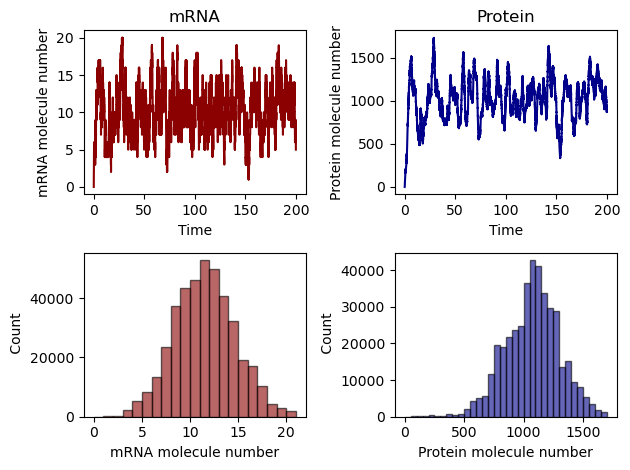

In [30]:
#Plotting

plt.subplot(2, 2, 1)

# Time series for mRNA
plt.plot(time_list, mRNA_list, color="darkred")
plt.title("mRNA")
plt.xlabel("Time")
plt.ylabel("mRNA molecule number")


plt.subplot(2, 2, 2)

#Time series for protein
plt.plot(time_list, protein_list, color="darkblue")
plt.title("Protein")
plt.xlabel("Time")
plt.ylabel("Protein molecule number")


#Steady-state histograms for the second half of the simulation data
half_simulation = len(time_list) // 2
mRNA_steady_state = mRNA_list#[half_simulation:]
protein_steady_state = protein_list#[half_simulation:]

#Define bins for histograms
mRNA_bins = np.arange(0, max(mRNA_steady_state) + 2, 1)
protein_bins = np.arange(0, max(protein_steady_state) + 2, 50)


plt.subplot(2, 2, 3)

#Histogram for mRNA
plt.hist(mRNA_steady_state, bins=mRNA_bins, alpha=0.6, color='darkred', edgecolor='black')
plt.xlabel("mRNA molecule number")
plt.ylabel(" Count")


plt.subplot(2, 2, 4)

#Histogram for protein
plt.hist(protein_steady_state, bins=protein_bins, alpha=0.6, color='darkblue', edgecolor='black')
plt.xlabel("Protein molecule number")
plt.ylabel(" Count")

plt.tight_layout()
plt.show()

---

<span style="color:red"> 
What we observe in this new model, is also balance. We observe in the mRNA there are a peaks but we still have a number of molecules of aroun 10 (+- 5). As for the counts we once again see more counts of molecules around 10. 
The same can be said about the protein. Although it may seem as though there is more noise in translation, we still have a regulate number of protein molecules. 
This makes sense as these plots show the expected variability in mRNA and protein levels in cells under constant conditions. The variability reflects gene expression noise, which is biologically significant because it contributes to differences between cells (even genetically identical ones).
In conclusion, this shows a balance between synthesis and degradation again that maintains steady state levels, showing a bit of noise as well 
</span>

---

Finally, scale the transcription and translation rates by the same factor, multiplying one of the rates and dividing the other, in such a way that the product remains constant, and discuss what happens with the mean and standard deviation of the distribution of protein numbers for different values of this factor (smaller and larger than 1).

In [ ]:

scaling_factor=1

k_tx = 10 #Transcription rate(mRNA synthesis)
k_tl = 100 #Translation rate(protein synthesis)

k_deg_mRNA = 1 #mRNA degradation rate
k_deg_protein = 1  #protein degradation rate

def scaled_sim(k_tx, k_tl, k_deg_mRNA, k_deg_protein, scaling_factor):

    k_tx_scaled = k_tx * scaling_factor
    k_tl_scaled = k_tl / scaling_factor

    #Parameters   
    c_time = 0 #reset c_time
    #use prev tmax
    mRNA_count = 0     #initial mRNA
    protein_count = 0  #initial protein


    # Lists to store simulation results
    time_list = []
    mRNA_list = []
    protein_list = []

    #Simulate

    while c_time < tmax:
        #record the current state
        time_list.append(c_time)
        mRNA_list.append(mRNA_count)
        protein_list.append(protein_count)

        #calculate propensities+total
        propensities = calculate_propensities(mRNA_count, protein_count, k_tx_scaled, k_tl_scaled, k_deg_mRNA, k_deg_protein)
        a_total = sum(propensities)

        #stop simulation if no reactions can occur
        if a_total == 0:
            break

        #determine the time to next reaction and update the time
        reaction_time = next_Rtime(a_total)
        c_time += reaction_time

        #determine which reaction occurs
        reaction = choose_reaction(propensities, a_total)
        mRNA_count, protein_count = update_counts(reaction, mRNA_count, protein_count)
    
    return time_list, mRNA_list, protein_list





Run the simulation for various scaling factors

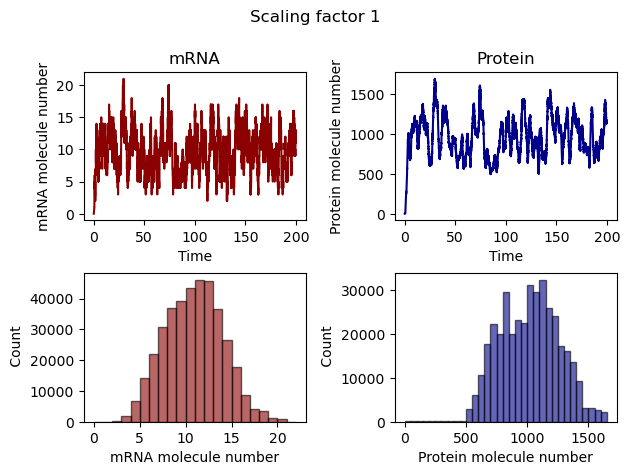

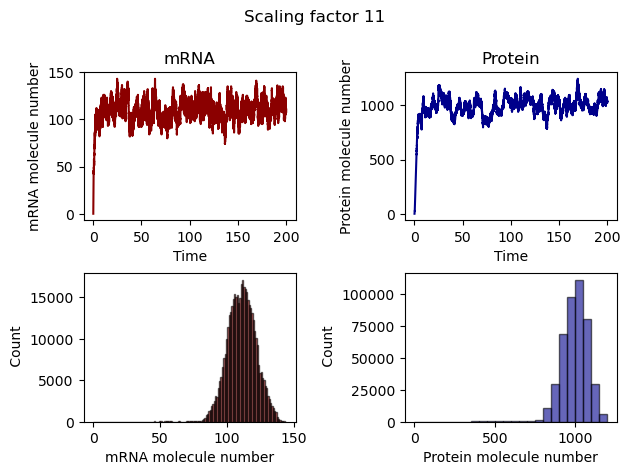

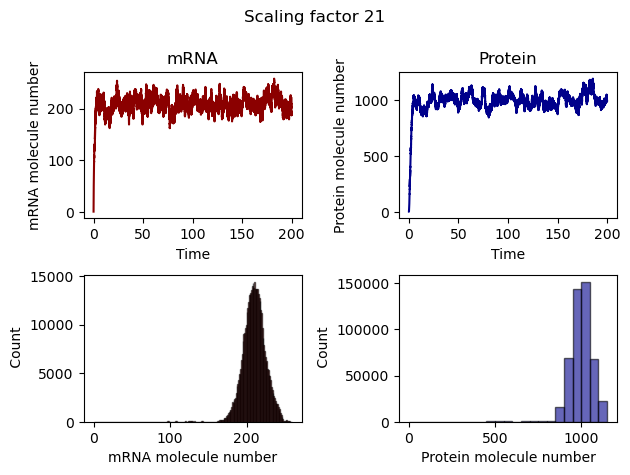

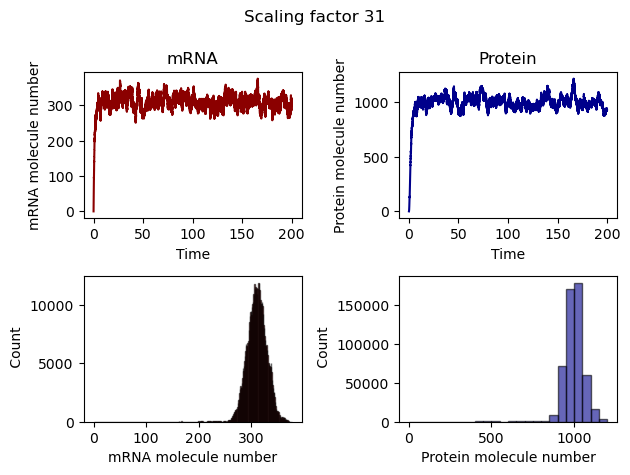

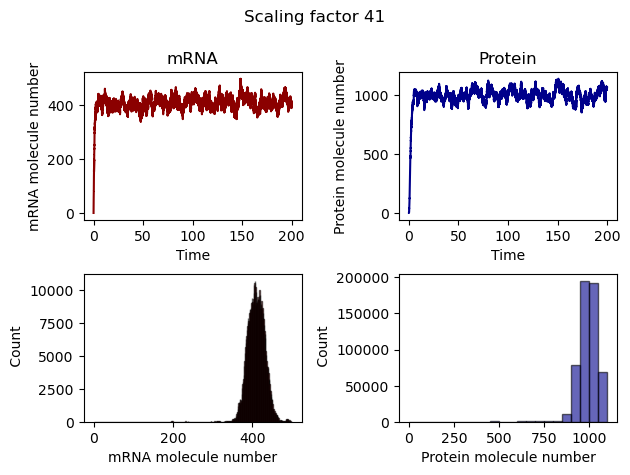

In [ ]:

for scaling_factor in range(1, 52, 10):

    time_list, mRNA_list, protein_list=scaled_sim(k_tx, k_tl, k_deg_mRNA, k_deg_protein, scaling_factor)

    #Plotting

    plt.subplot(2, 2, 1)

    # Time series for mRNA
    plt.plot(time_list, mRNA_list, color="darkred")
    plt.title("mRNA")
    plt.xlabel("Time")
    plt.ylabel("mRNA molecule number")


    plt.subplot(2, 2, 2)

    #Time series for protein
    plt.plot(time_list, protein_list, color="darkblue")
    plt.title("Protein")
    plt.xlabel("Time")
    plt.ylabel("Protein molecule number")


    #Steady-state histograms for the second half of the simulation data
    half_simulation = len(time_list) // 2
    mRNA_steady_state = mRNA_list#[half_simulation:]
    protein_steady_state = protein_list#[half_simulation:]

    #Define bins for histograms
    mRNA_bins = np.arange(0, max(mRNA_steady_state) + 2, 1)
    protein_bins = np.arange(0, max(protein_steady_state) + 2, 50)


    plt.subplot(2, 2, 3)

    #Histogram for mRNA
    plt.hist(mRNA_steady_state, bins=mRNA_bins, alpha=0.6, color='darkred', edgecolor='black')
    plt.xlabel("mRNA molecule number")
    plt.ylabel(" Count")


    plt.subplot(2, 2, 4)

    #Histogram for protein
    plt.hist(protein_steady_state, bins=protein_bins, alpha=0.6, color='darkblue', edgecolor='black')
    plt.xlabel("Protein molecule number")
    plt.ylabel(" Count")

    plt.tight_layout()
    plt.suptitle(f"Scaling factor {scaling_factor}")
    plt.subplots_adjust(top=0.85)
    plt.show()

---

<span style="color:red"> We've run the simulation multiple times with different scaling factors. Our main take-out is the fact that the bigger the scaling factor, the more stable the number of molecules, in both protein and mRNA.
This makes sense because cells want consistency accross changes for a stable functionning throughout its life. 
</span>

---